<a href="https://colab.research.google.com/github/nhocsukiem/DesicionTreeDog/blob/main/B%E1%BA%A3n_sao_c%E1%BB%A7a_DemoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cài thư viện cần

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from sklearn.tree import DecisionTreeClassifier
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from imutils import paths
import os 
import numpy as np
from sklearn.model_selection import train_test_split
import random 
import pickle

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

In [ ]:
image_paths = list(paths.list_images("/content/drive/MyDrive/archive"))
raw_images = []
labels = []

In [ ]:

def createImageFeatures(image, size=(224, 224)):
    # resize the image
    image = cv2.resize(image, size)
    # flatten the image
    pixel_list = image.flatten()
    return pixel_list

In [ ]:
image_paths

['/content/drive/MyDrive/archive/BichonFrise/BichonFrise .13.jpg',
 '/content/drive/MyDrive/archive/BichonFrise/BichonFrise .47.jpg',
 '/content/drive/MyDrive/archive/BichonFrise/BichonFrise .41.jpg',
 '/content/drive/MyDrive/archive/BichonFrise/BichonFrise .19.jpg',
 '/content/drive/MyDrive/archive/BichonFrise/BichonFrise .40.jpg',
 '/content/drive/MyDrive/archive/BichonFrise/BichonFrise .37.jpg',
 '/content/drive/MyDrive/archive/BichonFrise/BichonFrise .45.jpg',
 '/content/drive/MyDrive/archive/BichonFrise/BichonFrise .11.jpg',
 '/content/drive/MyDrive/archive/BichonFrise/BichonFrise .31.jpg',
 '/content/drive/MyDrive/archive/BichonFrise/BichonFrise .14.jpg',
 '/content/drive/MyDrive/archive/BichonFrise/BichonFrise .21.jpg',
 '/content/drive/MyDrive/archive/BichonFrise/BichonFrise .49.jpg',
 '/content/drive/MyDrive/archive/BichonFrise/BichonFrise .48.jpg',
 '/content/drive/MyDrive/archive/BichonFrise/BichonFrise .8.jpg',
 '/content/drive/MyDrive/archive/BichonFrise/BichonFrise .7.jpg

In [ ]:

# loop over the input images
for (i, image_path) in enumerate(image_paths):
    image = cv2.imread(image_path)
    label = image_path.split(os.path.sep)[-1].split(".")[0]
    # extract raw pixel intensity "features
    pixels = createImageFeatures(image)
    raw_images.append(pixels)
    labels.append(label)

In [ ]:
raw_images = np.array(raw_images)
labels = np.array(labels)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
raw_images= raw_images/255

In [ ]:
raw_images

array([[0.00784314, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00784314, 0.06666667, ..., 0.48627451, 0.5254902 ,
        0.55294118],
       [0.34509804, 0.36078431, 0.30196078, ..., 0.7372549 , 0.75686275,
        0.75294118],
       ...,
       [0.10980392, 0.21176471, 0.2745098 , ..., 0.4       , 0.48235294,
        0.5372549 ],
       [0.86666667, 0.85882353, 0.78823529, ..., 0.34901961, 0.3372549 ,
        0.28235294],
       [0.24313725, 0.60784314, 0.43137255, ..., 0.49411765, 0.63137255,
        0.64705882]])

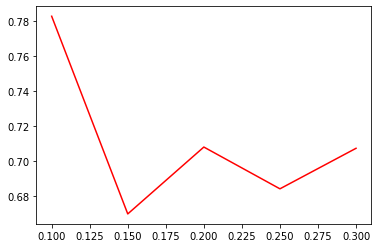

In [ ]:
x_label = []
test_size_matrix = [0.1,0.15,0.20,0.25,0.30]
result = []
for j in test_size_matrix:
  (train_X, test_X, train_y, test_y) = train_test_split(raw_images, labels, test_size=j, random_state=0)

  model =DecisionTreeClassifier()
  model.fit(train_X, train_y)
  acc = model.score(test_X, test_y)
  result.append(acc)
  x_label.append(i)
plt.plot(test_size_matrix,result,color = 'red')

In [ ]:
result

[0.782608695652174,
 0.6699029126213593,
 0.708029197080292,
 0.6842105263157895,
 0.7073170731707317]

In [ ]:
test_size_final = test_size_matrix[ result.index(max(result))]

In [ ]:
test_size_final

0.1

In [ ]:
(train_X, test_X, train_y, test_y) = train_test_split(raw_images, labels, test_size=test_size_final, random_state=0)
model =DecisionTreeClassifier()
model.fit(train_X, train_y)
acc = model.score(test_X, test_y)

In [ ]:
acc

0.782608695652174

In [ ]:
image = cv2.imread('/content/drive/MyDrive/archive/Affenhuahua/Affenhuahua .1.jpg')
image = cv2.resize(image, (224,224))
# flatten the image
pixel_list = image.flatten()

In [ ]:
pixel_list

array([57, 63, 70, ..., 94, 88, 81], dtype=uint8)

In [ ]:
pixel_list = np.array(pixel_list)

In [ ]:
pixel_list.shape

(150528,)

In [ ]:
pixel_list = pixel_list/ 255

In [ ]:
pixel_list

array([0.22352941, 0.24705882, 0.2745098 , ..., 0.36862745, 0.34509804,
       0.31764706])

(150528,)

In [ ]:
pixel_list = pixel_list.reshape(1,-1)

In [ ]:
pixel_list.shape

(1, 150528)

In [ ]:
y_pred = model.predict(pixel_list)

In [ ]:
print(y_pred)

['Affenhuahua ']
